In [2]:
import numpy as np
import math as m

### Scratch work

### 3D Principal Stresses (x, y, z coordinate system only)
Fill out matrix below as provided in the question. Relevant parameters will be printed.

In [28]:
stress_mat = np.array([[ 200, 150, 0],
                       [ 150, 20, 0],
                       [ 0, 0, 0]])

principal_stresses(stress_mat[0, 0], stress_mat[0, 1], stress_mat[0, 2], stress_mat[1, 1], stress_mat[1, 2], stress_mat[2, 2])

Invariants:  220 -18500 0.0
Principal stresses:  [284.928556845359, 0.0, -64.92855684535901]
Direction:  [0.8701999067534787, 0.4926988149835931, 0.0]
Octahedral normal stress: 73.33 MPa
Octahedral shear stress: 151.95 MPa
Abs max shearing stress: 174.93 MPa


### Centroid and Moment of Inertia Finder

Input shape as a series of points from a CSYS origin. Intended to check answers only.


    Area
        A = -420.0
    Centroid
        cz = 29.857142857142858
        cy = 15.0
    Moments and product of inertia
        Izz = 14220.0
        Iyy = 86951.42857142858
        Iyz = -0.0
    Principal moments of inertia and direction
        I1 = -14220.0
        I2 = -86951.42857142858
        θ︎ = -0.0°


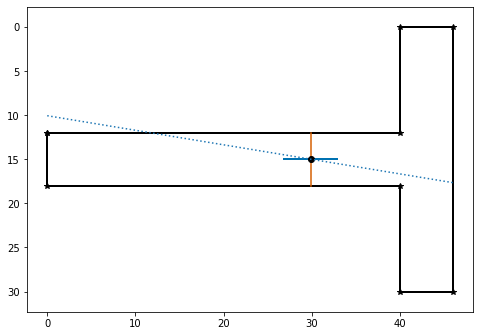

In [7]:
# Function call. USE THIS ONLY.
shape = [(0, 12), (0, 18), (40, 18), (40, 30), (46, 30), (46, 0), (40, 0), (40, 12)]
print(summary(shape))

a, cz, cy, Izz, Iyy, Iyz, I1, I2, theta = values(shape)

# Define moments
Myy = 1
Mzz = 1
# # Define points of interest
# A = (0, 0)
# y = A[1]-cy
# z = A[0]-cz

#################
# 'Use this when you have to solve for a moment, Mo, given a maximum allowable stress, sigma'
# sigma_x = 290e6/1.2 # Solution
# Mo = 1 # Parameter of interest
# sxt = 0 # Trial stress
# print("\n### Begin iterative solution ###")
# while abs((abs(sxt) - abs(sigma_x))/sigma_x) > .0000001:
#     Myy = Mo*np.sin(alpha)
#     Mzz = Mo*np.cos(alpha)
#     sxt = bending_stress(y, z, Myy, Mzz, Iyy, Izz, Iyz)
#     Mo = Mo + Mo*abs((abs(sxt) - abs(sigma_x))/sigma_x) 
#     print('Trial stress: %.2f' % sxt)
#     if abs(sxt) > abs(sigma_x):
#         break
# print("### End iterative solution ###\n")
# print('Mo = %.2f N-m' % Mo)
##################

# print('Bending stress: %.2f Pa' % bending_stress(y, z, Myy, Mzz, Iyy, Izz, Iyz))
# print('Angle of neutral axis: %.2f deg' % neutral_axis(Myy, Mzz, Iyy, Izz, Iyz))
outline(shape, 'skewed', format='png', size=(8, 6))

In [6]:
def principal_stresses(sigma_x, tau_xy, tau_xz, sigma_y, tau_yz, sigma_z):
    # Calculate principal stresses
    stress_matrix = np.array([[sigma_x, tau_xy, tau_xz],
                             [tau_xy, sigma_y, tau_yz],
                             [tau_xz, tau_yz, sigma_z]])
    i1 = sigma_x + sigma_y + sigma_z
    i2 = sigma_x*sigma_y + sigma_y*sigma_z + sigma_x*sigma_z - tau_xy**2 - tau_yz**2 - tau_xz**2
    i3 = np.linalg.det(stress_matrix)
    sigma_p = sorted(np.roots([1, -i1, i2, -i3]), reverse=True)

    # Calculate directional cosines (l, m, n)
    a = np.linalg.det(
        np.array([[sigma_y-sigma_p[0], tau_yz],
                  [tau_yz, sigma_z-sigma_p[0]]]))
    b = -np.linalg.det(
        np.array([[tau_xy, tau_yz],
                  [tau_xz, sigma_z-sigma_p[0]]]))
    c = np.linalg.det(
        np.array([[tau_xy, sigma_y-sigma_p[0]],
                  [tau_xz, tau_yz]]))
    k = 1/m.sqrt(a**2 + b**2 + c**2)
    l1 = a*k
    m1 = b*k
    n1 = c*k
    dir_cos = [l1, m1, n1]

    sigma_oct = sum(sigma_p)/3
    tau_oct = m.sqrt((sigma_p[0]-sigma_p[1])**2 + (sigma_p[1]-sigma_p[2])**2 + (sigma_p[2]-sigma_p[0])**2)/3
    tau_max = (sigma_p[0]-sigma_p[2])/2

    # print('Prime CSYS stresses: ', prime_stress_matrix)
    print('Invariants: ', i1, i2, i3)
    print('Principal stresses: ', sigma_p)
    print('Direction: ', dir_cos)
    print('Octahedral normal stress: %.2f MPa' % sigma_oct)
    print('Octahedral shear stress: %.2f MPa' % tau_oct)
    print('Abs max shearing stress: %.2f MPa' % tau_max)

In [3]:
import matplotlib.pyplot as plt
from math import atan2, sin, cos, sqrt, pi, degrees

def area(pts):
    'Area of cross-section.'

    if pts[0] != pts[-1]:
        pts = pts + pts[:1]
    z = [ c[0] for c in pts ]
    y = [ c[1] for c in pts ]
    s = 0
    for i in range(len(pts) - 1):
        s += z[i]*y[i+1] - z[i+1]*y[i]
    return s/2


def centroid(pts):
    'Location of centroid.'

    if pts[0] != pts[-1]:
        pts = pts + pts[:1]
    z = [ c[0] for c in pts ]
    y = [ c[1] for c in pts ]
    sz = sy = 0
    a = area(pts)
    for i in range(len(pts) - 1):
        sz += (z[i] + z[i+1])*(z[i]*y[i+1] - z[i+1]*y[i])
        sy += (y[i] + y[i+1])*(z[i]*y[i+1] - z[i+1]*y[i])
    return sz/(6*a), sy/(6*a)


def inertia(pts):
    'Moments and product of inertia about centroid.'

    if pts[0] != pts[-1]:
        pts = pts + pts[:1]
    z = [ c[0] for c in pts ]
    y = [ c[1] for c in pts ]
    szz = syy = syz = 0
    a = area(pts)
    cz, cy = centroid(pts)
    for i in range(len(pts) - 1):
        szz += (y[i]**2 + y[i]*y[i+1] + y[i+1]**2)*(z[i]*y[i+1] - z[i+1]*y[i])
        syy += (z[i]**2 + z[i]*z[i+1] + z[i+1]**2)*(z[i]*y[i+1] - z[i+1]*y[i])
        syz += (z[i]*y[i+1] + 2*z[i]*y[i] + 2*z[i+1]*y[i+1] + z[i+1]*y[i])*(z[i]*y[i+1] - z[i+1]*y[i])
    return szz/12 - a*cy**2, syy/12 - a*cz**2, syz/24 - a*cz*cy


def principal(Izz, Iyy, Iyz):
    'Principal moments of inertia and orientation.'

    avg = (Izz + Iyy)/2
    diff = (Izz - Iyy)/2      # signed
    I1 = avg + sqrt(diff**2 + Iyz**2)
    I2 = avg - sqrt(diff**2 + Iyz**2)
    theta = atan2(-Iyz, diff)/2
    return I1, I2, theta

def values(pts):
    a = area(pts)
    cz, cy = centroid(pts)
    Izz, Iyy, Iyz = inertia(pts)
    I1, I2, theta = principal(Izz, Iyy, Iyz)
    return a, cz, cy, -Izz, -Iyy, -Iyz, I1, I2, theta

def bending_stress(y, z, Myy, Mzz, Iyy, Izz, Iyz, loading='uniaxial'):
    if loading == 'uniaxial':
        return ((Myy*Izz + Mzz*Iyz)*z - (Myy*Iyz + Mzz*Iyy)*y)/(Iyy*Izz - Iyz**2)

def neutral_axis(Myy, Mzz, Iyy, Izz, Iyz):
    phi = (180/np.pi)*(Myy*Izz + Mzz*Iyz)/(Myy*Iyz + Mzz*Iyy)        
    return phi

def summary(pts):
    'Text summary of cross-sectional properties.'

    a = area(pts)
    cz, cy = centroid(pts)
    Izz, Iyy, Iyz = inertia(pts)
    I1, I2, theta = principal(Izz, Iyy, Iyz)
    
    summ = """
    Area
        A = {}
    Centroid
        cz = {}
        cy = {}
    Moments and product of inertia
        Izz = {}
        Iyy = {}
        Iyz = {}
    Principal moments of inertia and direction
        I1 = {}
        I2 = {}
        θ︎ = {}°""".format(a, cz, cy, -Izz, -Iyy, -Iyz, I1, I2, degrees(theta))
    return summ
 
def outline(pts, basename='section', format='pdf', size=(8, 8), dpi=100):
    'Draw an outline of the cross-section with centroid and principal axes.'

    if pts[0] != pts[-1]:
        pts = pts + pts[:1]
    z = [ c[0] for c in pts ]
    y = [ c[1] for c in pts ]

    # Get the bounds of the cross-section
    minz = min(z)
    maxz = max(z)
    miny = min(y)
    maxy = max(y)

    # Whitespace border is 5% of the larger dimension
    b = .05*max(maxz - minz, maxy - miny)

    # Get the properties needed for the centroid and principal axes
    cz, cy = centroid(pts)
    i = inertia(pts)
    p = principal(*i)

    # Principal axes extend 10% of the minimum dimension from the centroid
    length = min(maxz-minz, maxy-miny)/10
    a1z = [cz - length*cos(p[2]), cz + length*cos(p[2])]
    a1y = [cy - length*sin(p[2]), cy + length*sin(p[2])]
    a2z = [cz - length*cos(p[2] + pi/2), cz + length*cos(p[2] + pi/2)]
    a2y = [cy - length*sin(p[2] + pi/2), cy + length*sin(p[2] + pi/2)]
    
    phi = neutral_axis(Myy, Mzz, Iyy, Izz, Iyz)*np.pi/180
    neutral_z = [minz, cz, maxz]
    neutral_y = [cy-(cz-minz)*np.tan(phi), cy, cy-(cz-maxz)*np.tan(phi)]

    # Plot and save
    # Axis colors chosen from http://mkweb.bcgsc.ca/colorblind/
    fig, ax = plt.subplots(figsize=size)
    ax.plot(z, y, 'k*-', lw=2)
    ax.plot(a1z, a1y, '-', color='#0072B2', lw=2)     # blue
    ax.plot(a2z, a2y, '-', color='#D55E00')           # vermillion
    ax.plot(cz, cy, 'ko', mec='k')
    ax.plot(neutral_z, neutral_y, linestyle=':')
    ax.set_aspect('equal')
    plt.xlim(xmin=minz-b, xmax=maxz+b)
    plt.ylim(ymin=miny-b, ymax=maxy+b)
    plt.gca().invert_yaxis()
    filename = basename + '.' + format
    plt.show()
    plt.close()
